<a href="https://colab.research.google.com/github/harshavardhansannithi/ARDS-using-Machine-learning/blob/main/KNN_vs_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Load your dataset (replace with your actual data)
data = pd.read_csv("/content/drive/MyDrive/survey lung cancer.csv")

In [4]:
# Separate features and target variable
X = data.drop("LUNG_RECRUITMENT", axis=1)
y = data["LUNG_RECRUITMENT"]


In [5]:
# Feature scaling (optional)
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming 'column_name' is the column containing string values
le = LabelEncoder()
X['GENDER'] = le.fit_transform(X['GENDER'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
import pandas as pd

In [7]:
X = pd.DataFrame(X)

In [8]:
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
dtypes: int64(15)
memory usage: 36.3 KB


In [9]:
X_scaled = scaler.fit_transform(X)

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on test data
y_pred_knn = knn.predict(X_test)

# Evaluate performance using metrics like accuracy, precision, recall, etc.
accuracy_knn = round(accuracy_score(y_test, y_pred_knn)*100,2)
precision_knn = precision_score(y_test, y_pred_knn, pos_label='YES')
recall_knn = recall_score(y_test, y_pred_knn, pos_label='YES')

print("KNN Accuracy:", accuracy_knn)
print("KNN Precision:", precision_knn)
print("KNN Recall:", recall_knn)



KNN Accuracy: 93.55
KNN Precision: 0.9651162790697675
KNN Recall: 0.9651162790697675


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define the Logistic Regression model
lr = LogisticRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions on test data
y_pred_lr = lr.predict(X_test)

# Evaluate performance using metrics
accuracy_lr = round(accuracy_score(y_test, y_pred_lr)*100,2)
precision_lr = precision_score(y_test, y_pred_lr, pos_label='YES')
recall_lr = recall_score(y_test, y_pred_lr, pos_label='YES')

print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Precision:", precision_lr)
print("Logistic Regression Recall:", recall_lr)



Logistic Regression Accuracy: 97.85
Logistic Regression Precision: 0.9772727272727273
Logistic Regression Recall: 1.0


In [13]:
scores = [accuracy_lr,accuracy_knn]
algorithms = ["Logistic Regression","K-Nearest Neighbors"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 97.85 %
The accuracy score achieved using K-Nearest Neighbors is: 93.55 %


In [14]:
import seaborn as sns

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

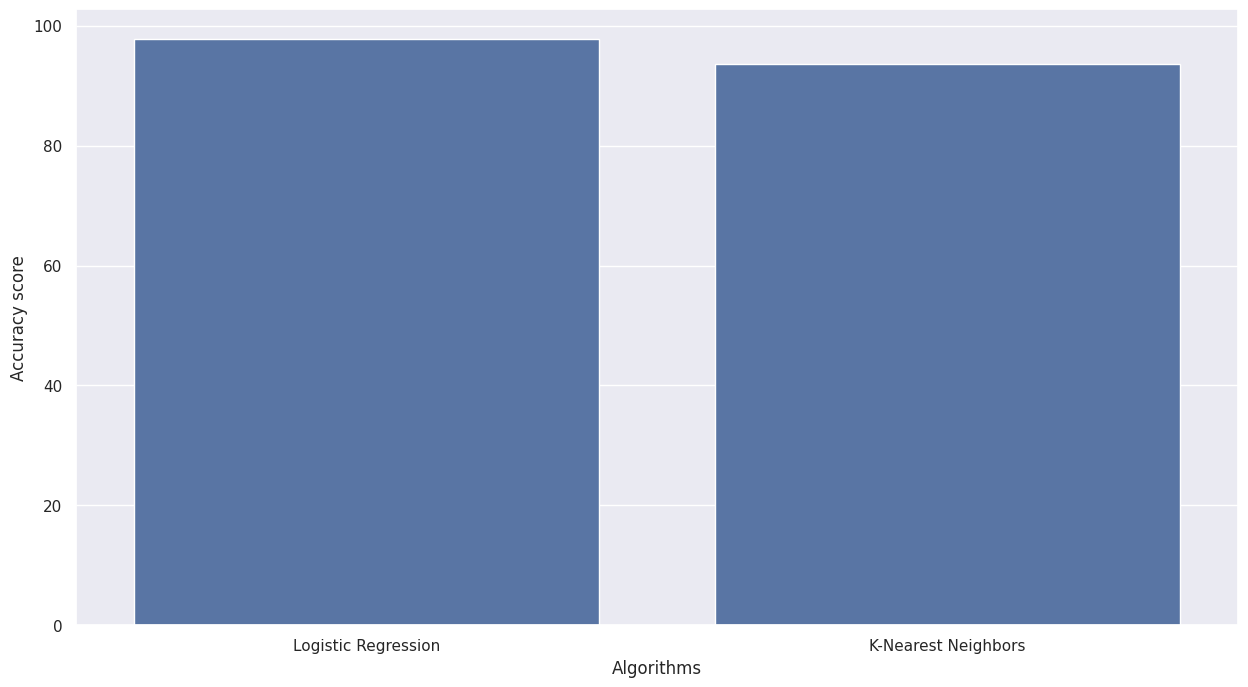

In [15]:
# Install the matplotlib module if necessary
!pip install matplotlib

# Import the matplotlib.pyplot module
import matplotlib.pyplot as plt

# Set the figure size
sns.set(rc={'figure.figsize':(15,8)})

# Set the x-axis label
plt.xlabel("Algorithms")

# Set the y-axis label
plt.ylabel("Accuracy score")

# Create a bar plot
sns.barplot(x=algorithms, y=scores)